<a href="https://colab.research.google.com/github/tiwarikaran/fast.ai-for-meme-classifcation/blob/main/fastai_meme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resnet50 and Densenet201


In [ ]:
from fastai.vision import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = Path('/content/drive/MyDrive/data')

In [ ]:
data_path

PosixPath('/content/drive/MyDrive/data')

In [ ]:
data = ImageDataBunch.from_folder(data_path,
                                  valid = 'valid',
                                  test = 'test',
                                  size = 128,)

In [ ]:
data

ImageDataBunch;

Train: LabelList (400 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
meme,meme,meme,meme,meme
Path: /content/drive/MyDrive/data;

Valid: LabelList (180 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
meme,meme,meme,meme,meme
Path: /content/drive/MyDrive/data;

Test: LabelList (20 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: /content/drive/MyDrive/data

In [ ]:
print(data.classes,'||Length of Training set',len(data.train_ds),'||Length of Validation set',len(data.valid_ds),'||Length of Test set',len(data.test_ds))

['meme', 'not_meme'] ||Length of Training set 400 ||Length of Validation set 180 ||Length of Test set 20


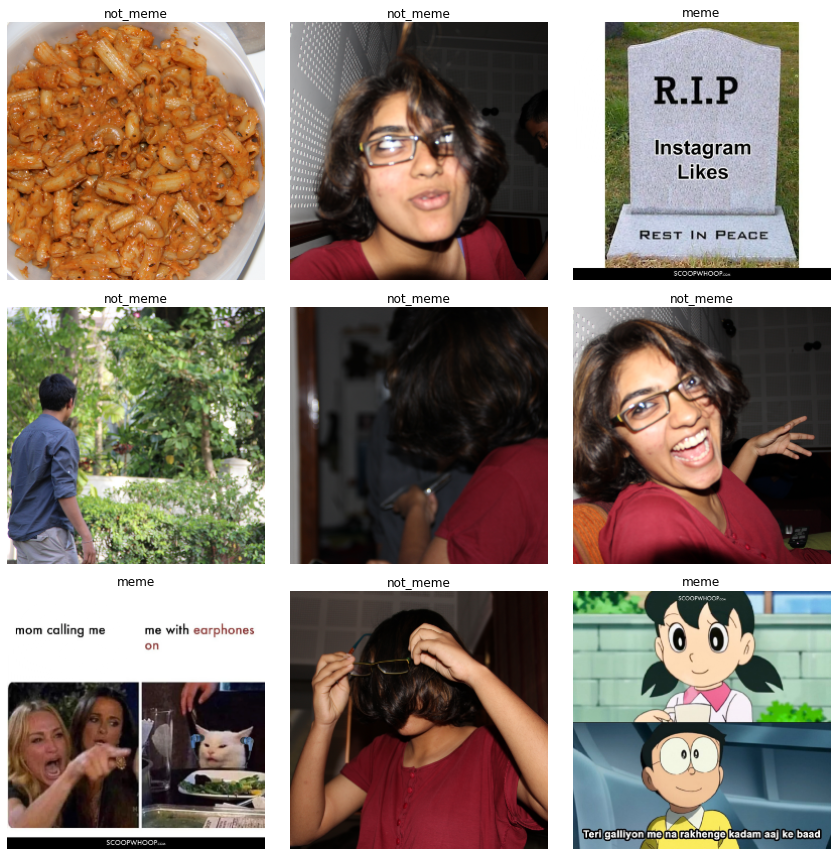

In [ ]:
data.show_batch(rows=3)

In [ ]:
learn = cnn_learner(data,
                    models.resnet50,
                    metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.577796,0.559995,0.894444,04:00
1,0.305377,1.196695,0.833333,02:20
2,0.191198,0.525601,0.883333,02:15
3,0.134635,0.241278,0.944444,02:19
4,0.105835,0.126466,0.977778,02:18


In [ ]:
learn = cnn_learner(data,
                    models.densenet201,
                    metrics = accuracy)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.579105,0.137492,0.944444,04:38
1,0.299786,0.114052,0.966667,02:05
2,0.187706,0.105218,0.961111,02:08
3,0.132079,0.113353,0.938889,02:11
4,0.098930,0.113846,0.933333,02:09


In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


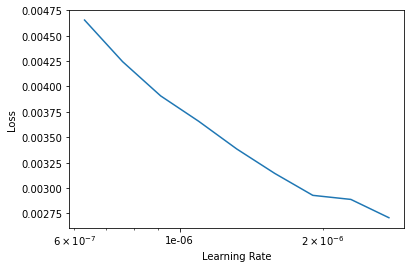

In [ ]:
learn.recorder.plot()

# EfficientNet-b7

In [ ]:
pip install efficientnet_pytorch 

In [ ]:
from efficientnet_pytorch import EfficientNet 

In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b7')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth



Loaded pretrained weights for efficientnet-b7


In [ ]:
model._fc

Linear(in_features=2560, out_features=1000, bias=True)

In [ ]:
nn.Linear(100,2)

Linear(in_features=100, out_features=2, bias=True)

In [ ]:
model._fc = nn.Linear(100,2)

In [ ]:
data_path_en = Path('/content/drive/MyDrive/data').absolute()

In [ ]:
data_path_en

PosixPath('/content/drive/MyDrive/data')

In [ ]:
data_en = ImageDataBunch.from_folder(data_path_en,
                                  valid = 'valid',
                                  size = 256,
                                  ds_tfms = get_transforms()
                                  ).normalize(imagenet_stats)

In [ ]:
!nvidia-smi

Thu Jan  7 11:42:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    32W / 250W |   5371MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [ ]:
data_en

ImageDataBunch;

Train: LabelList (400 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
meme,meme,meme,meme,meme
Path: /content/drive/MyDrive/data;

Valid: LabelList (180 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
meme,meme,meme,meme,meme
Path: /content/drive/MyDrive/data;

Test: None

In [ ]:
model

In [ ]:
learn_en = Learner(data_en,
                   model,
                   bn_wd = False,
                   loss_func = LabelSmoothingCrossEntropy,
                   metrics = accuracy
                   ).to_fp16()

In [ ]:
learn_en.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored